## Import

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import scanpy.external as sce
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import math
import bbknn
import warnings
import scvelo as scv
import cellrank as cr
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.verbosity = 0  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.set_figure_params(scanpy=True, dpi=150, dpi_save=500, frameon=False, vector_friendly=True, fontsize=14, figsize=None, color_map=None, format='pdf', facecolor=None, transparent=True)

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors
baguette = matplotlib.colors.LinearSegmentedColormap.from_list("", ["whitesmoke","dodgerblue","blue"])

In [136]:
Progenitors = '#1f77b4'
BrownAdipocytes ='#ff7f0e'
ConnectiveTissue ='#279e68'
Dermis ='#d62728'
DermisPrecursors ='#c45b41'
Bone= '#aa40fc'
BrownAdipocytesPrecursors ='#8c564b'
SmoothMuscle= '#e377c2'
Cartilage ='#b5bd61'
CartilagePrecursors= '#8ebf84'
Tendon ='#17becf'
Blood ='#aec7e8'

SkeletalMuscle='#78295f'
Neuro='#979fbd'

## Human and mouse merged

In [ ]:
adata=sc.read('datasets/human_merge_mice_processed.h5ad')

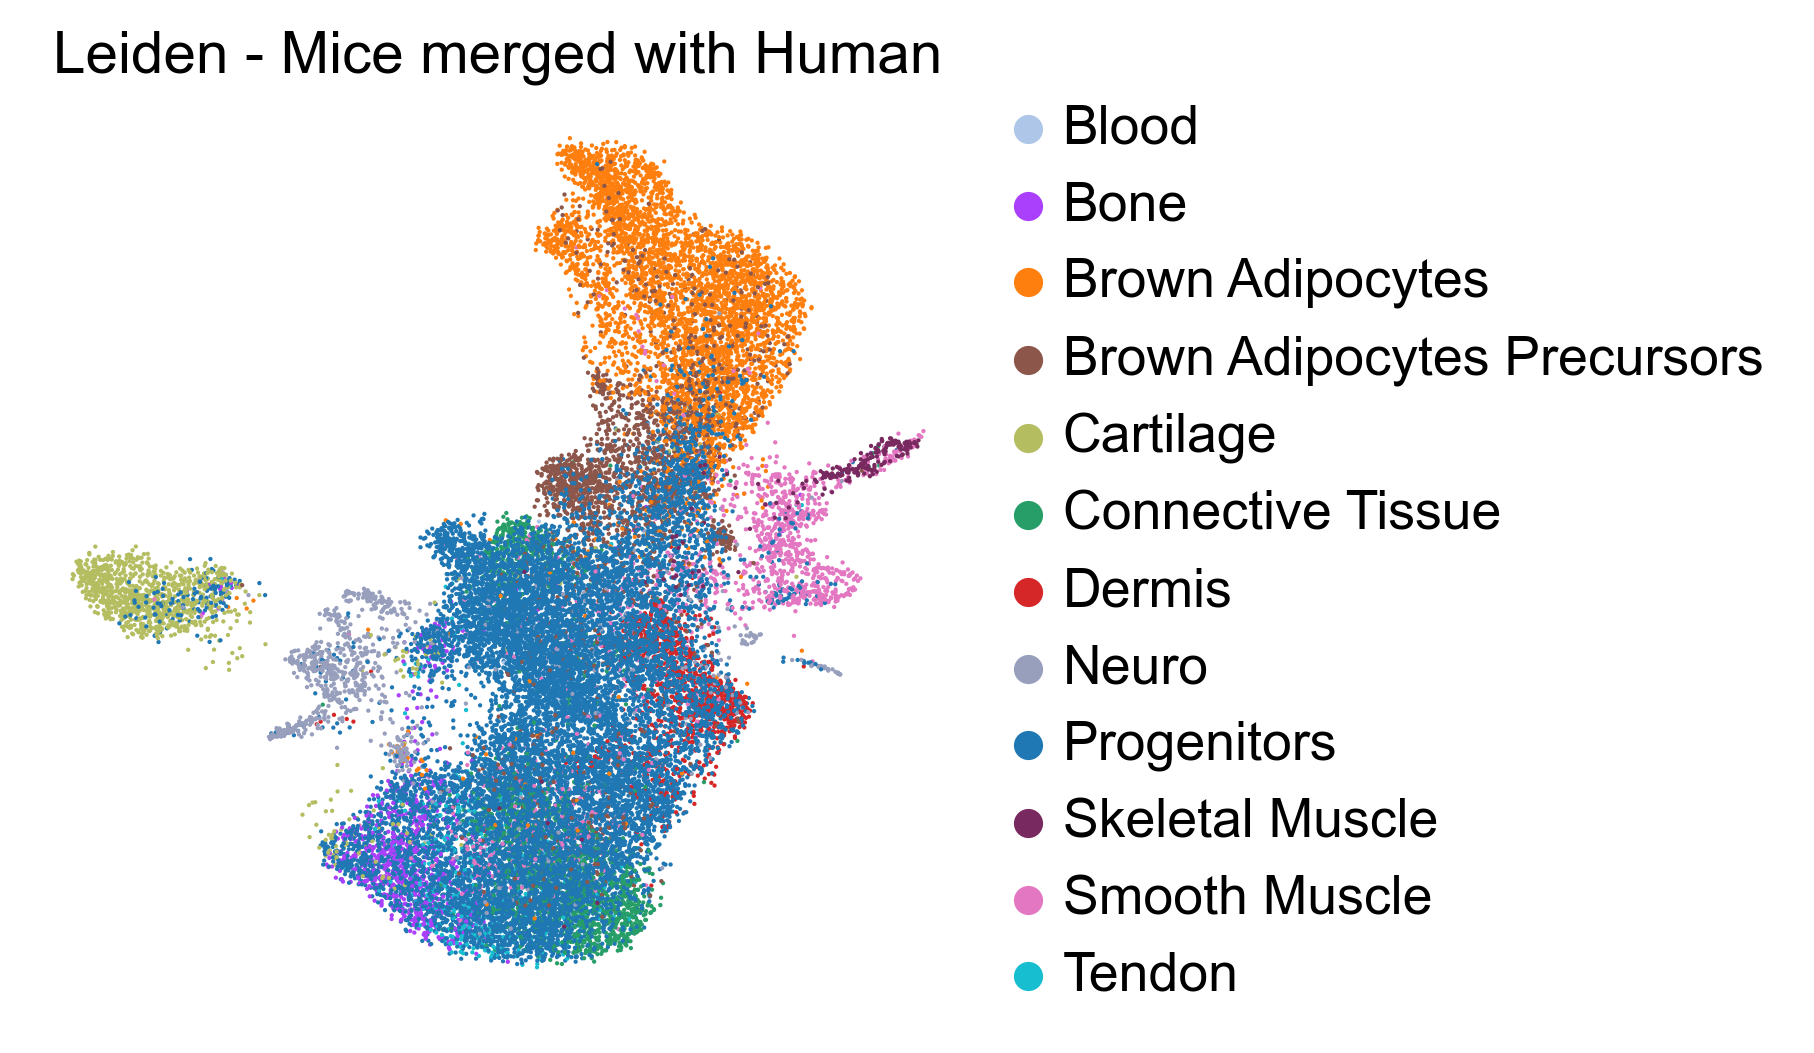

In [146]:
sc.pl.umap(adata, color=['clusters_og_og'], title='Leiden - Mice merged with Human', save='merge_humanandmice_original_annotation.pdf',
           palette=[Blood,Bone,BrownAdipocytes,BrownAdipocytesPrecursors,Cartilage,ConnectiveTissue,Dermis,Neuro,Progenitors,SkeletalMuscle,SmoothMuscle,Tendon])

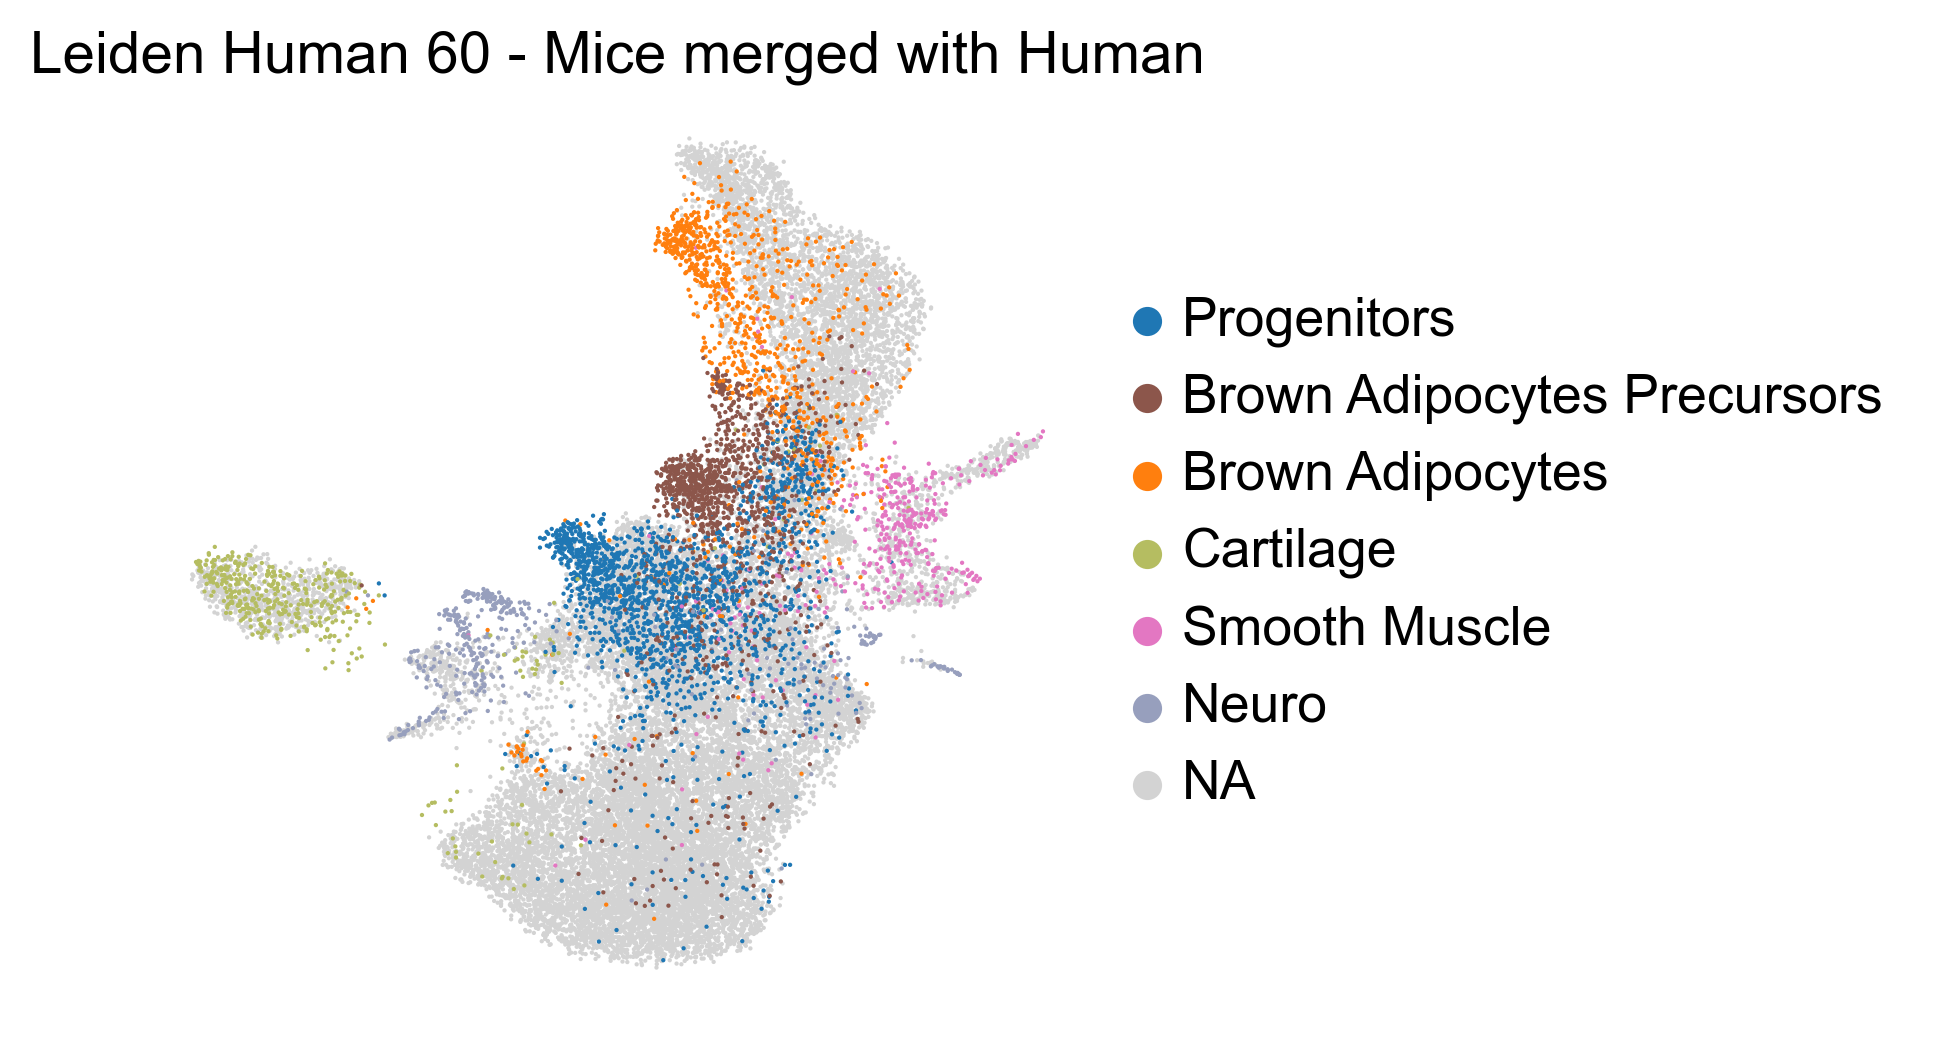

In [147]:
sc.pl.umap(adata, color=['clusters_human_60'], title='Leiden Human 60 - Mice merged with Human', save='merge_human_60.pdf',
           palette=[Progenitors,BrownAdipocytesPrecursors,BrownAdipocytes,Cartilage,SmoothMuscle,Neuro])

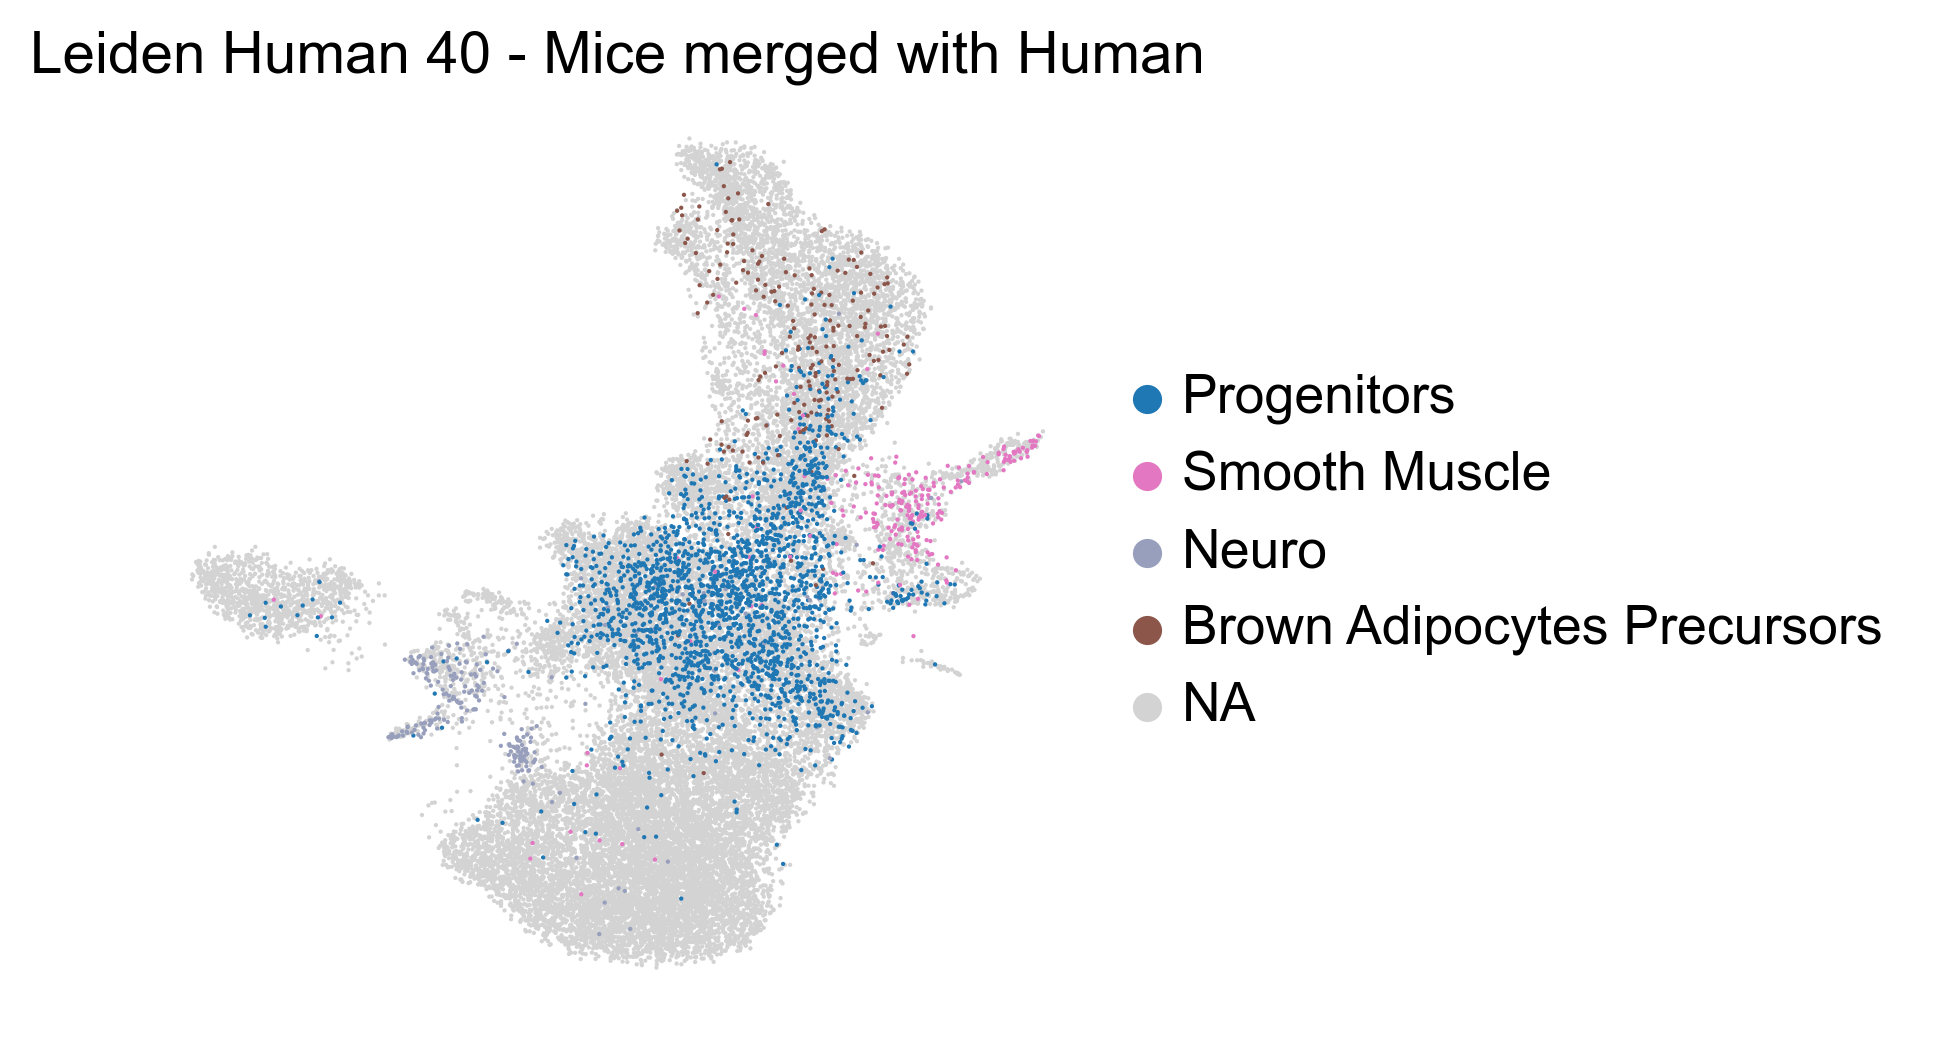

In [148]:
sc.pl.umap(adata, color=['clusters_human_40'], title='Leiden Human 40 - Mice merged with Human', save='merge_human_40.pdf',
           palette=[Progenitors,SmoothMuscle,Neuro,BrownAdipocytesPrecursors])

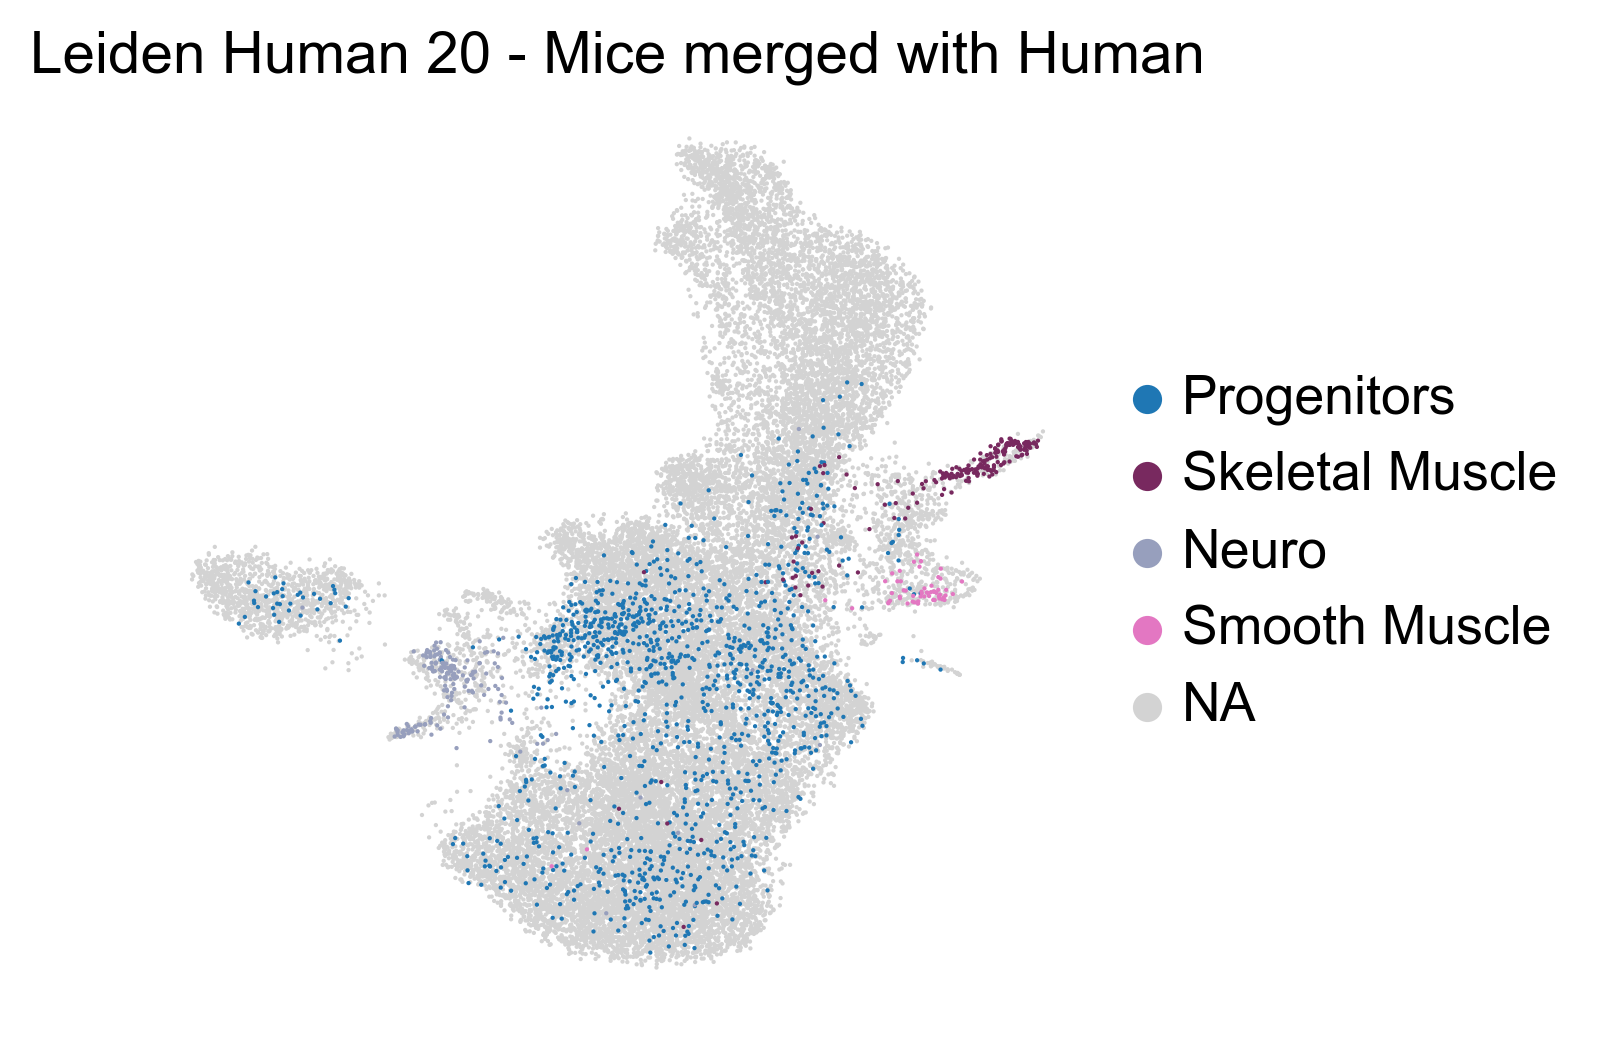

In [149]:
sc.pl.umap(adata, color=['clusters_human_20'], title='Leiden Human 20 - Mice merged with Human', save='merge_human_20.pdf',
           palette=[Progenitors,SkeletalMuscle,Neuro,SmoothMuscle])

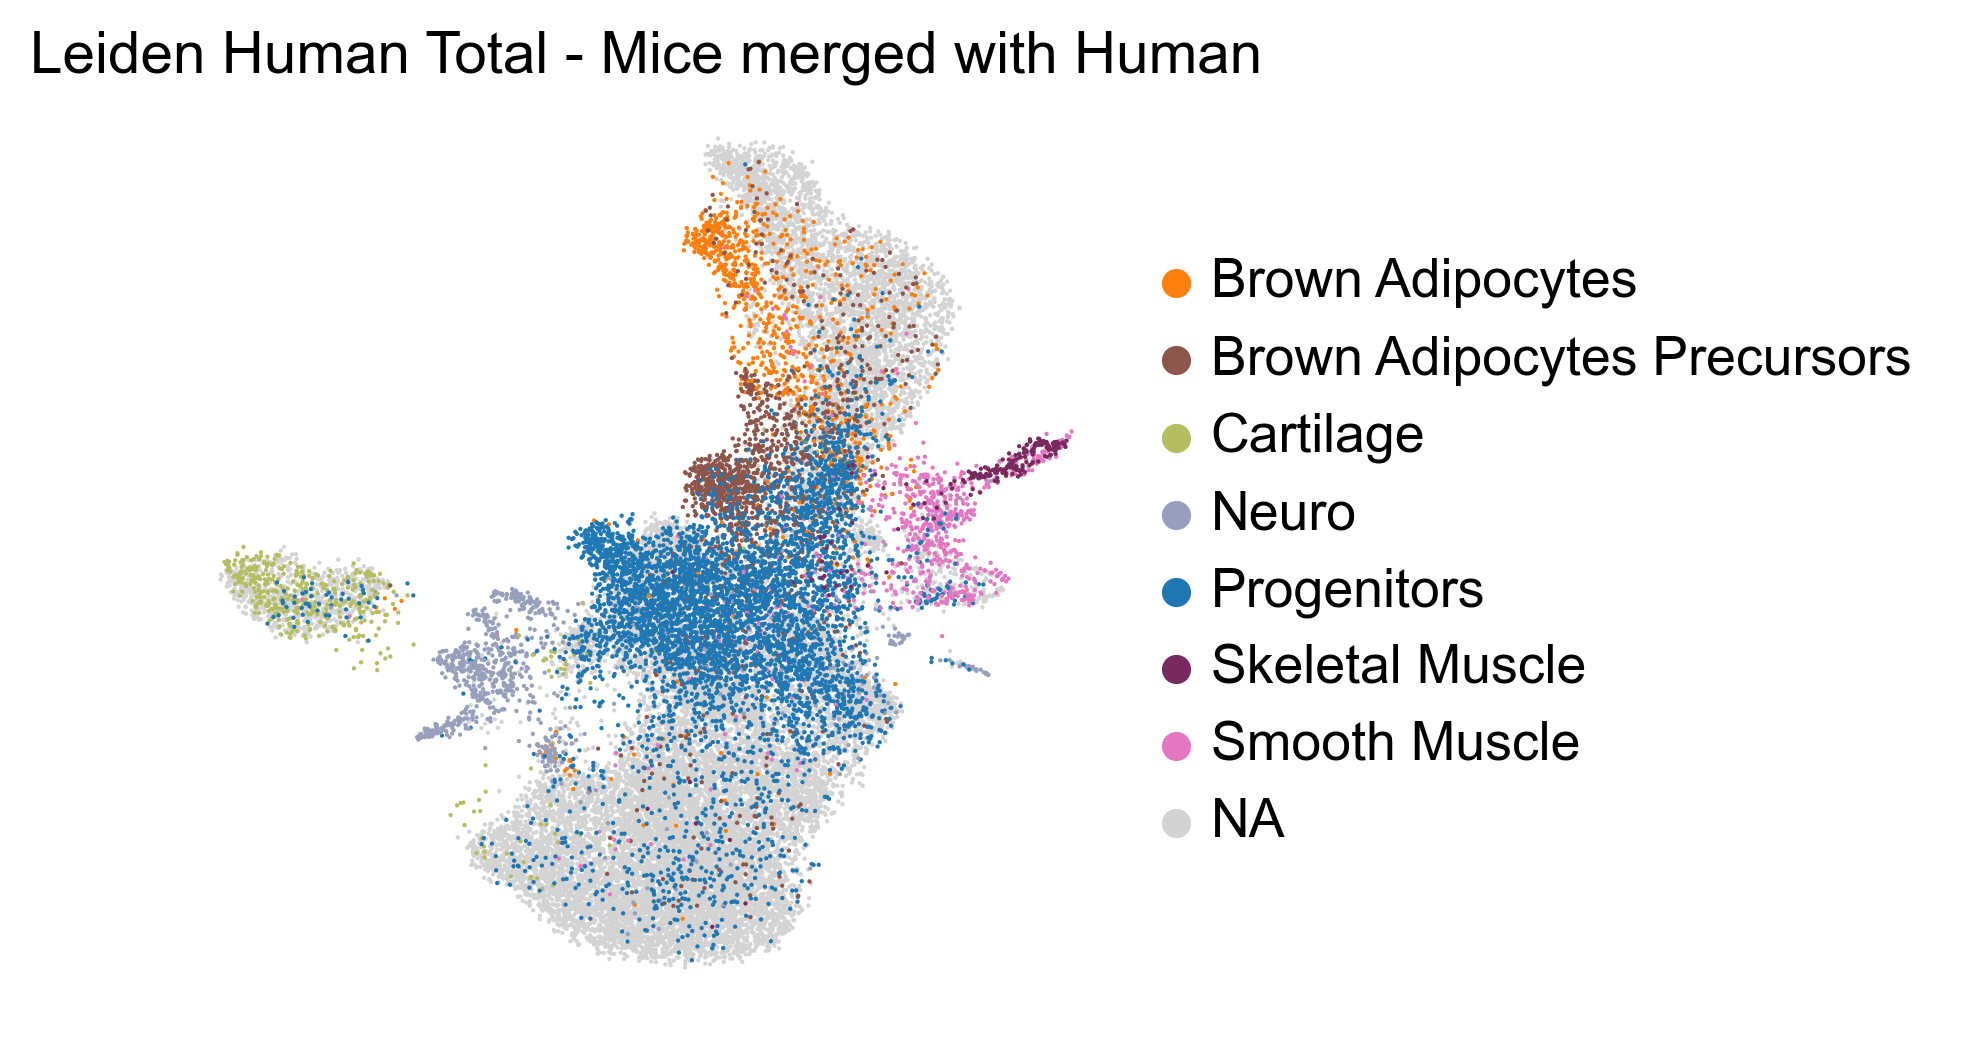

In [150]:
sc.pl.umap(adata, color=['clusters_human'], title='Leiden Human Total - Mice merged with Human', save='merge_human_total.pdf',
           palette=[BrownAdipocytes,BrownAdipocytesPrecursors,Cartilage,Neuro,Progenitors,SkeletalMuscle,SmoothMuscle])

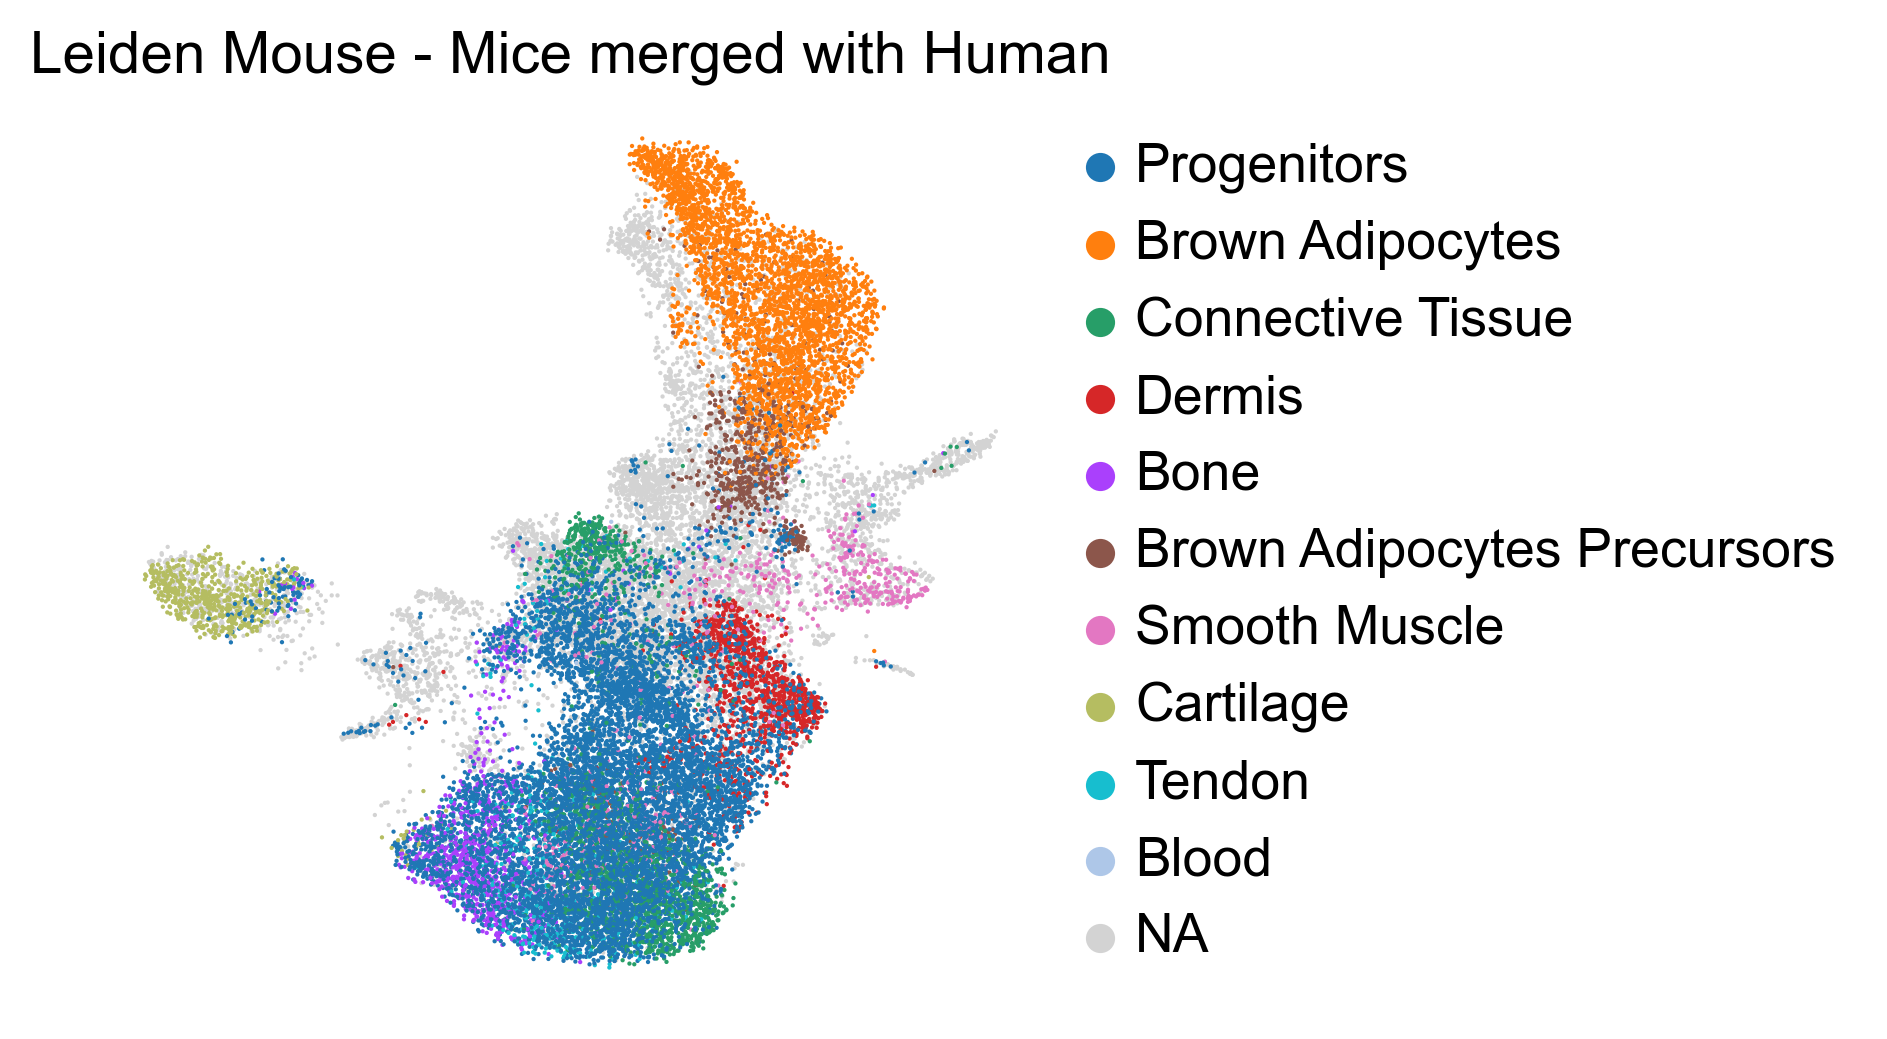

In [151]:
sc.pl.umap(adata, color=['clusters_mouse'], title='Leiden Mouse - Mice merged with Human', save='merge_mouse_leiden.pdf',
           palette=[Progenitors,BrownAdipocytes,ConnectiveTissue,Dermis,Bone,BrownAdipocytesPrecursors,SmoothMuscle,Cartilage,Tendon,Blood])

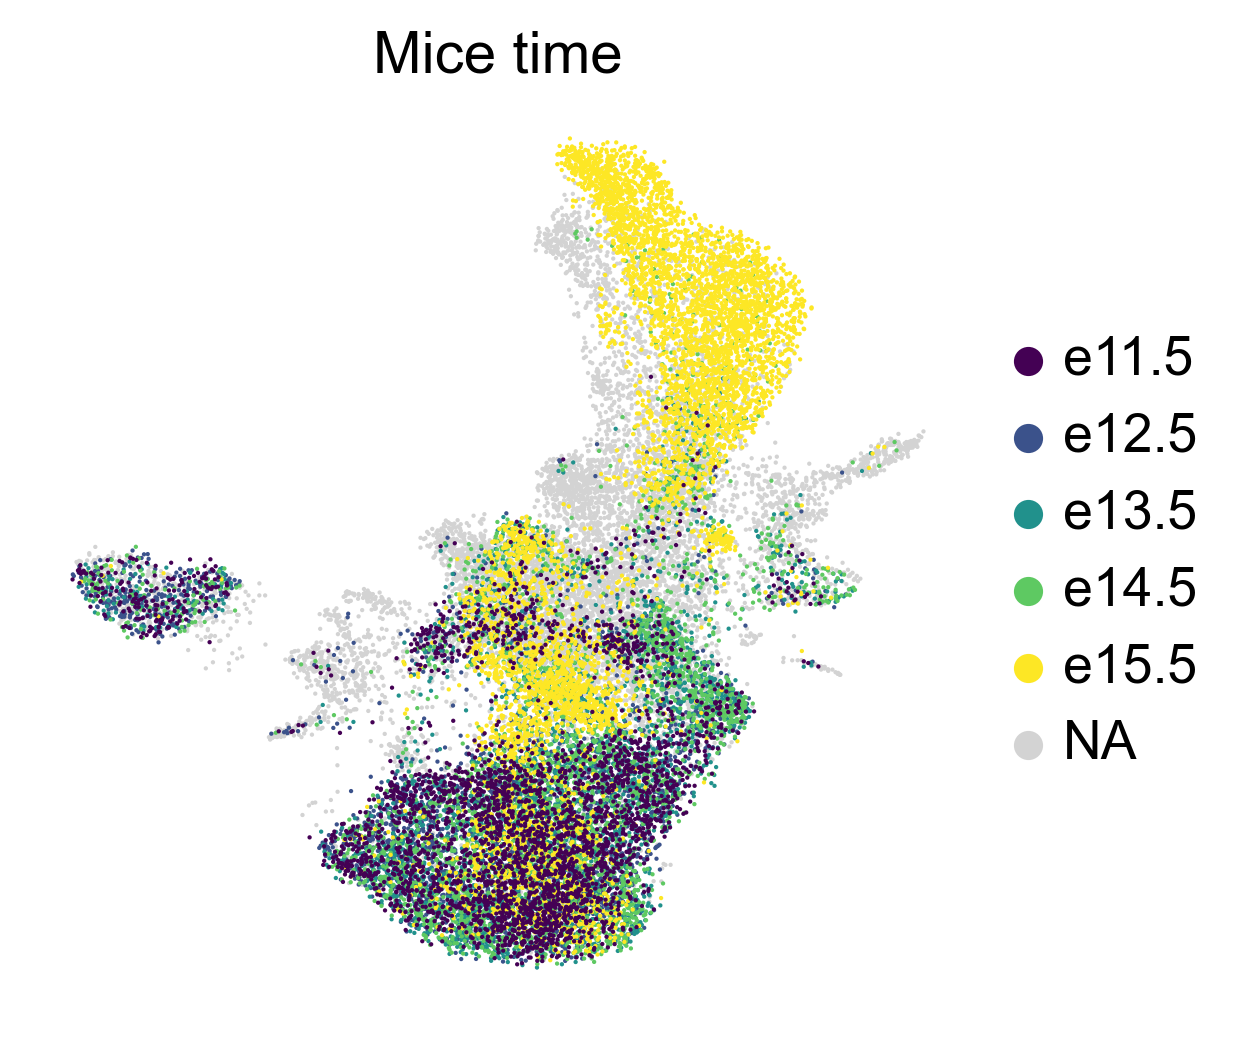

In [152]:
sc.pl.umap(adata, color=['day'], groups=['e11.5', 'e12.5', 'e13.5', 'e14.5', 'e15.5'], title='Mice time', save='merge_mouse_time.pdf', palette=['#21918c', '#5ec962', '#fde725', '#440154', '#3b528b'])

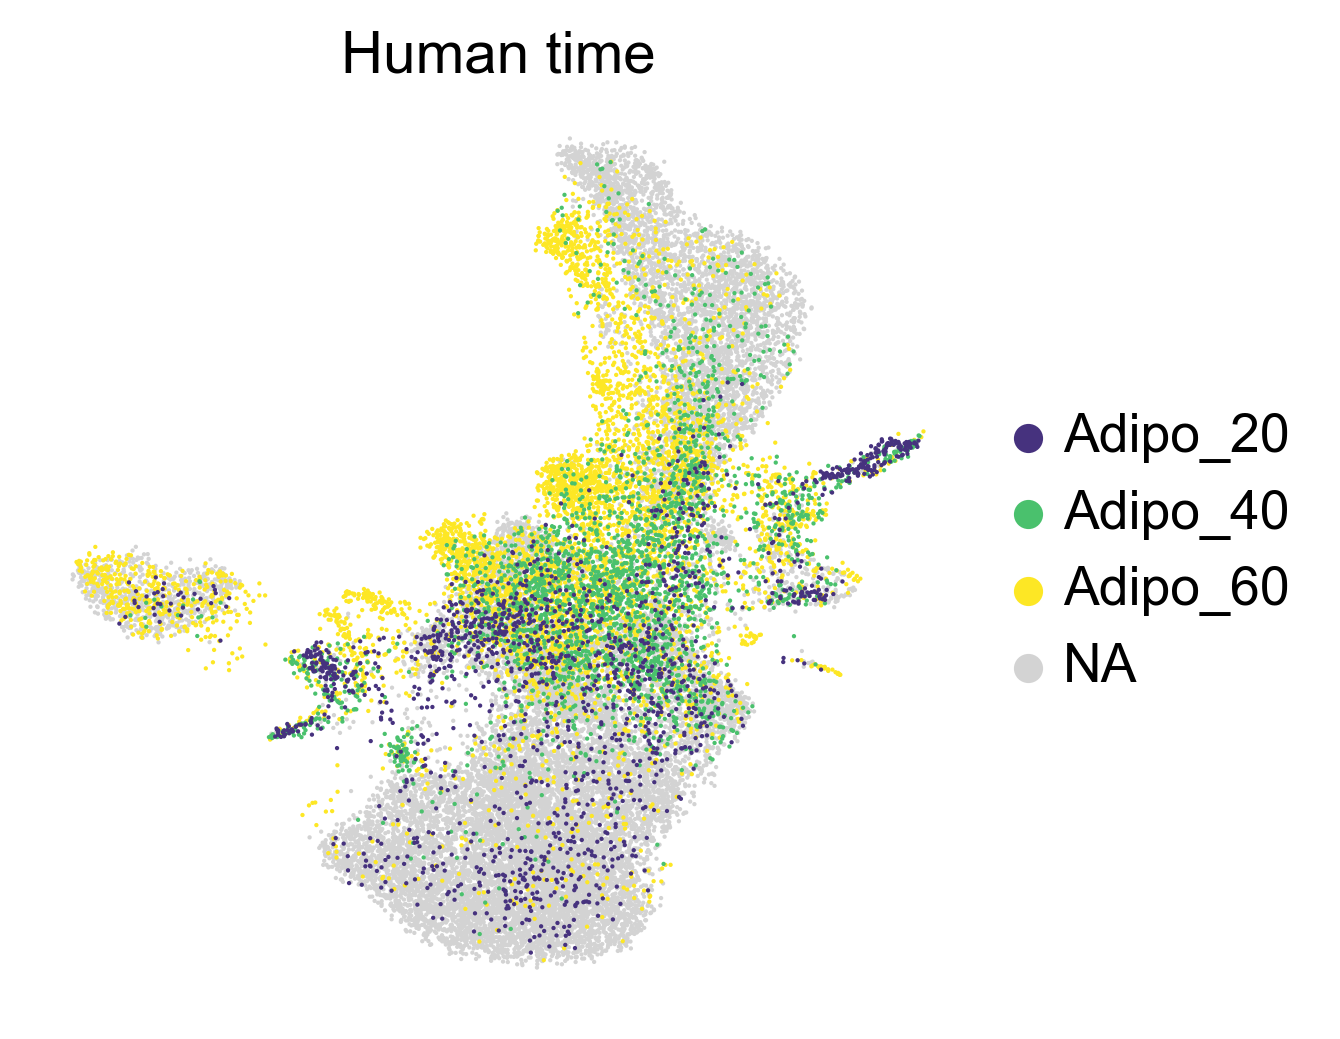

In [153]:
sc.pl.umap(adata, color=['day'], groups=['Adipo_20', 'Adipo_40', 'Adipo_60'], title='Human time', save='merge_human_time.pdf', palette=['#46327e','#4ac16d', '#fde725'])

## Classifier

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scanpy as sc

### Clusters

In [155]:
import helper_functions_dew as dew
import pickle

In [156]:
mouse = sc.read('datasets/mouse_all.h5ad')

# Build classifiers in PCA space
mouseClassifier = dew.train_classifiers(X = mouse.X, labels = mouse.obs['clusters'], PCs = mouse.varm['PCs'], 
                                      gene_ind = mouse.var['highly_variable'])

# Save mouseClassifier as lightweight pickle file
pickle.dump(mouseClassifier, open('mouseClassifier.pickle', 'wb'))

NearestNeighbors 0.969
RandomForest 0.951
NeuralNet 0.964
LDA 0.931


In [157]:
human_total=sc.read('datasets/human60.h5ad')

In [158]:
# Load mouseClassifier and predict cell states
mouseClassifier = pickle.load(open('mouseClassifier.pickle','rb'))
human_total = dew.predict_classes(human_total, mouseClassifier)

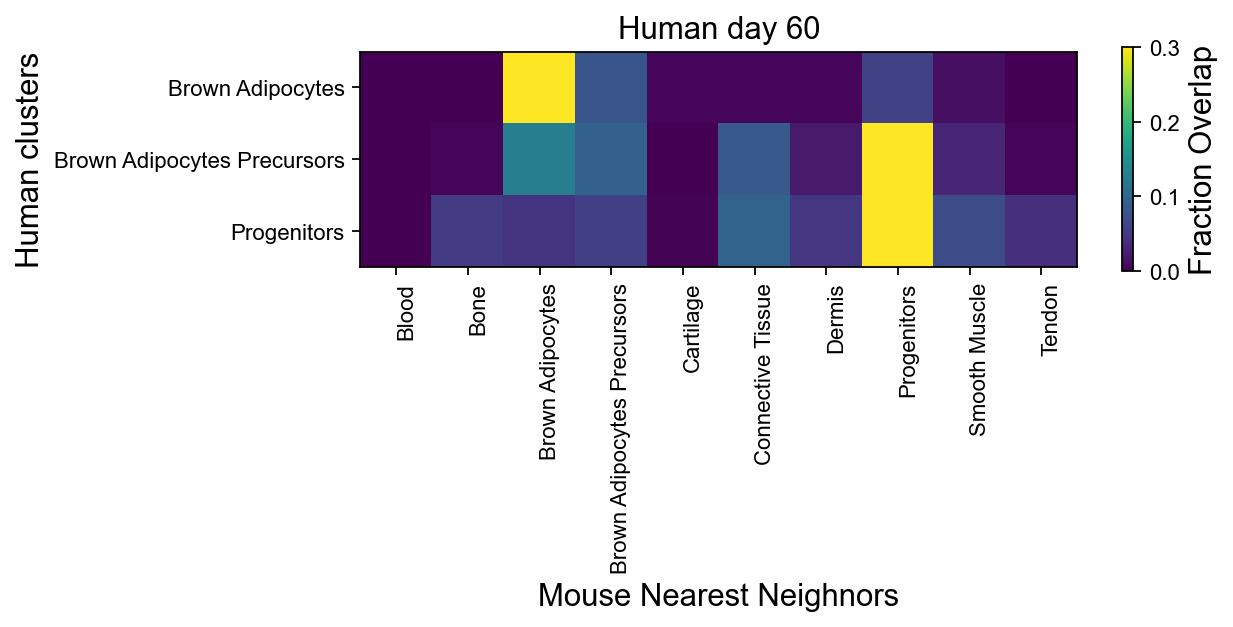

In [159]:
# Compare classification results 
#human_total_pPSM = human_total[human_total.obs['louvain'].isin(['d4-5 pPSM']),:]
human_total_pPSM = human_total.obs['leiden']
alg = ['NearestNeighbors']

for al in alg:
    dew.plot_confusion_matrix(human_total.obs['pr_'+al],human_total.obs['leiden'], title=' ', 
                              normalize=True, cmap='viridis', vmin=0, vmax=0.3)
    plt.title("Human day 60")
    plt.ylabel("Human clusters")
    plt.xlabel("Mouse Nearest Neighnors")
    plt.subplots_adjust(bottom=0, left=0, right=1.4, top=0.7)
    plt.savefig('figures/classifier_human60.pdf', dpi=600, bbox_inches='tight')

In [160]:
human_total=sc.read('datasets/human40.h5ad')

In [161]:
# Load mouseClassifier and predict cell states
mouseClassifier = pickle.load(open('mouseClassifier.pickle','rb'))
human_total = dew.predict_classes(human_total, mouseClassifier)

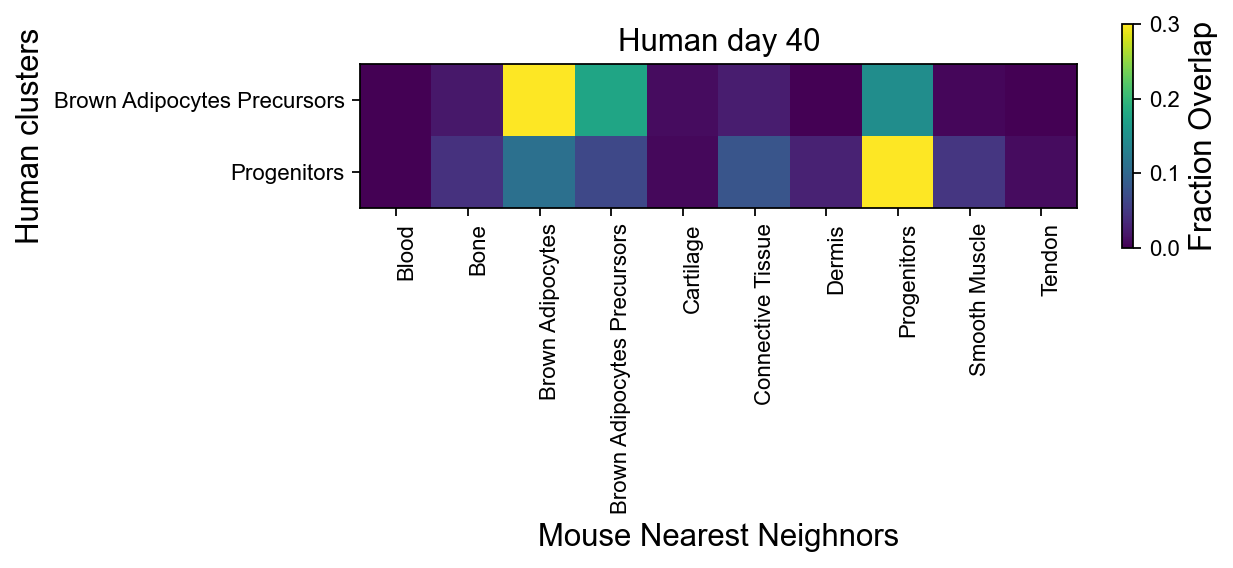

In [162]:
# Compare classification results 
#human_total_pPSM = human_total[human_total.obs['louvain'].isin(['d4-5 pPSM']),:]
human_total_pPSM = human_total.obs['leiden']
alg = ['NearestNeighbors']

for al in alg:
    dew.plot_confusion_matrix(human_total.obs['pr_'+al],human_total.obs['leiden'], title=' ', 
                              normalize=True, cmap='viridis', vmin=0, vmax=0.3)
    plt.title("Human day 40")
    plt.ylabel("Human clusters")
    plt.xlabel("Mouse Nearest Neighnors")
    plt.subplots_adjust(bottom=0, left=0, right=1.4, top=0.7)
    plt.savefig('figures/classifier_human40.pdf', dpi=600, bbox_inches='tight')

In [163]:
human_total=sc.read('datasets/human20.h5ad')

In [164]:
# Load mouseClassifier and predict cell states
mouseClassifier = pickle.load(open('mouseClassifier.pickle','rb'))
human_total = dew.predict_classes(human_total, mouseClassifier)

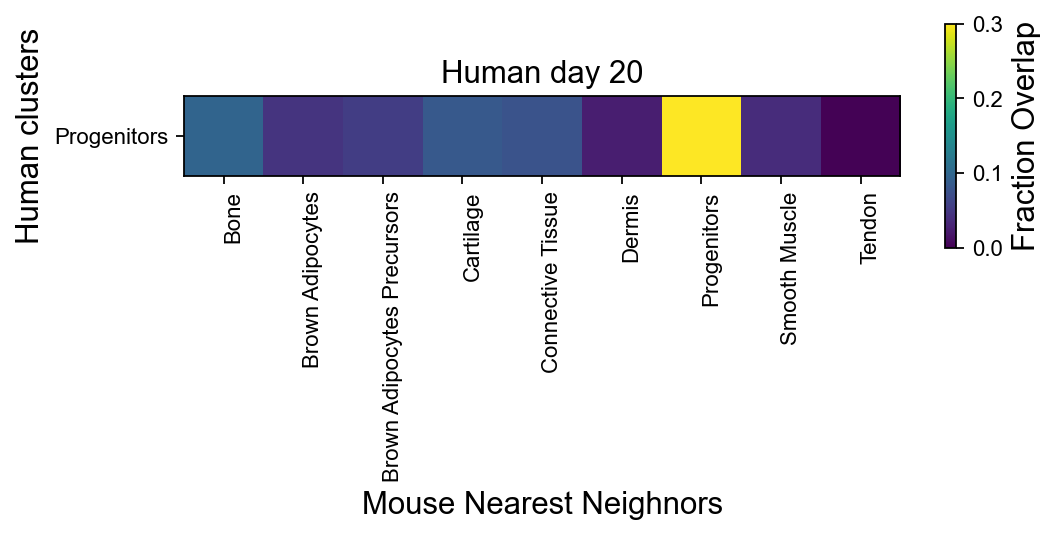

In [165]:
# Compare classification results 
#human_total_pPSM = human_total[human_total.obs['louvain'].isin(['d4-5 pPSM']),:]
human_total_pPSM = human_total.obs['leiden']
alg = ['NearestNeighbors']

for al in alg:
    dew.plot_confusion_matrix(human_total.obs['pr_'+al],human_total.obs['leiden'], title=' ', 
                              normalize=True, cmap='viridis', vmin=0, vmax=0.3)
    plt.title("Human day 20")
    plt.ylabel("Human clusters")
    plt.xlabel("Mouse Nearest Neighnors")
    plt.subplots_adjust(bottom=0, left=0, right=1.4, top=0.7)
    plt.savefig('figures/classifier_human20.pdf', dpi=600, bbox_inches='tight')

### Age

In [166]:
import helper_functions_dew as dew
import pickle

In [167]:
mouse = sc.read('datasets/mouse_all.h5ad')

# Build classifiers in PCA space
mouseClassifier = dew.train_classifiers(X = mouse.X, labels = mouse.obs['time'], PCs = mouse.varm['PCs'], 
                                      gene_ind = mouse.var['highly_variable'])

# Save mouseClassifier as lightweight pickle file
pickle.dump(mouseClassifier, open('mouseClassifierDAYS.pickle', 'wb'))

NearestNeighbors 0.801
RandomForest 0.846


C:\Users\Yannis\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


NeuralNet 0.847


C:\Users\Yannis\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


LDA 0.843


In [168]:
human_total = sc.read('datasets/human204060.h5ad')

In [169]:
sc.pp.filter_genes(human_total, min_cells=2)
sc.pp.filter_genes(human_total, min_counts=100)

In [170]:
sc.pp.normalize_total(human_total)
sc.pp.highly_variable_genes(human_total)
sc.pp.scale(human_total)
sc.tl.pca(human_total)

In [171]:
# Load mouseClassifier and predict cell states
mouseClassifier = pickle.load(open('mouseClassifierDAYS.pickle','rb'))
human_total = dew.predict_classes(human_total, mouseClassifier)

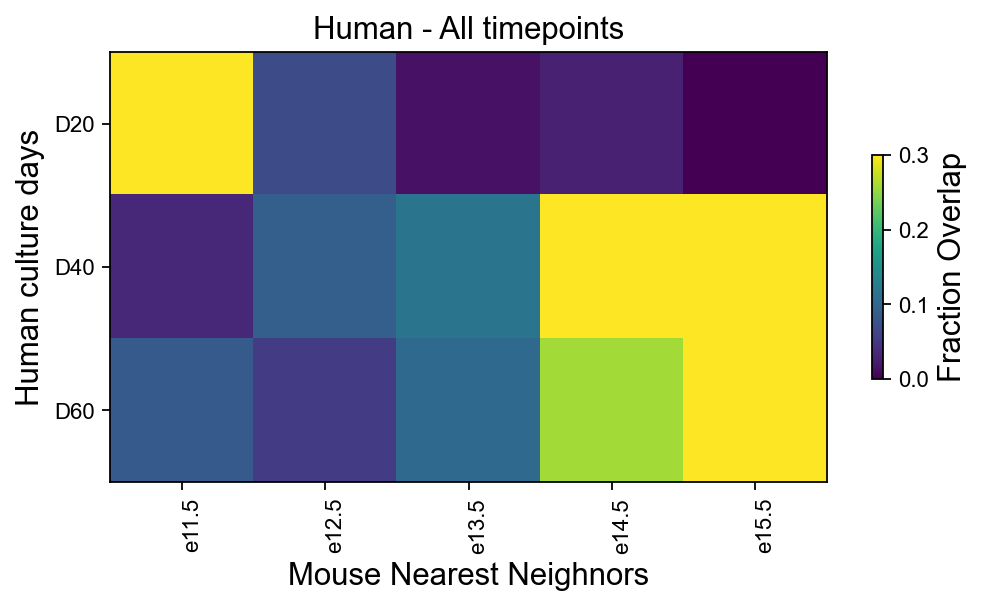

In [172]:
# Compare classification results 
#human_total_pPSM = human_total[human_total.obs['louvain'].isin(['d4-5 pPSM']),:]
human_total_pPSM = human_total.obs['sort_id']
alg = ['NearestNeighbors']

for al in alg:
    dew.plot_confusion_matrix(human_total.obs['pr_'+al],human_total.obs['sort_id'], title=' ', 
                              normalize=True, cmap='viridis', vmin=0, vmax=0.3)
    plt.title("Human - All timepoints")
    plt.ylabel("Human culture days")
    plt.xlabel("Mouse Nearest Neighnors")
    plt.subplots_adjust(bottom=0, left=0, right=1.4, top=0.7)
    plt.savefig('figures/classifier_humanalldays.pdf', dpi=600, bbox_inches='tight')